In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
clsr_names=["Nearest Neighbors", "Linear SVM",
            "Decision Tree", "Random Forest",
            "Naive Bayes"]

In [3]:
classifiers = [KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    GaussianNB()]

In [4]:
df01=pd.read_csv('bank-additional.csv', sep=';',header=0)
df02=df01.dropna(axis=1, how='all')
df=df02.dropna(axis=0, how='any')
cols=df.dtypes
colnms=df.columns
i=0
cat_cols=[]
for eachcol in cols:
    if eachcol.name=="object":
        cat_cols.append(colnms[i])
    i+=1

In [5]:
df1=pd.get_dummies(df,columns=cat_cols)
n=len(df1.index)
m=len(df1.columns)
x_all=df1.iloc[:,0:(m-2)]
y_all=df1['y_yes']

In [6]:
x_trn, x_tst, y_trn, y_tst = train_test_split(x_all, y_all, test_size=0.8, random_state=42)
scaler = MinMaxScaler()
scaler.fit(x_trn)
x_trn_n=scaler.transform(x_trn)
x_tst_n=scaler.transform(x_tst)
clf = classifiers[1]
model=clf.fit(x_trn_n,y_trn)
y_pred=model.predict(x_tst_n)
acc1=float((y_pred==y_tst).sum())/float(len(y_tst))
print("Linear SVM accuracy: {0:.3f}%".format(acc1))
weight=model.coef_[0]
var2wgt=pd.DataFrame(list(zip(list(df1),weight)),columns=['variable','weight'])
var2wgt_sorted=var2wgt.reindex(var2wgt.weight.abs().sort_values(ascending=False).index)
print("Top 10 weighted variables:")
print(var2wgt_sorted[0:10])

Linear SVM accuracy: 0.889%
Top 10 weighted variables:
            variable    weight
1           duration  0.192532
6     cons.price.idx  0.082992
50         month_mar  0.075000
9        nr.employed -0.074419
4           previous  0.050301
8          euribor3m -0.042549
54         month_sep -0.030763
45         month_apr -0.028609
12  job_entrepreneur -0.025000
62  poutcome_success  0.025000


(0.0, 11.0)

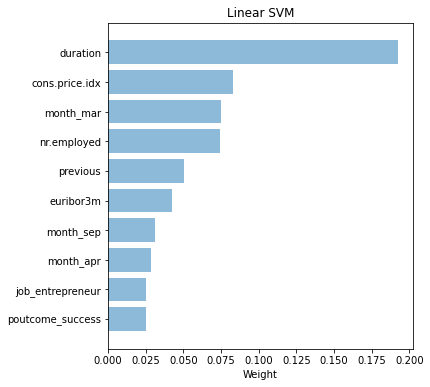

In [7]:
var_names=list(var2wgt_sorted['variable'][0:10])
var_imp=list(var2wgt_sorted['weight'][0:10].abs())
y_pos = np.arange(len(var_names),0,-1)
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(y_pos, var_imp, align='center', alpha=0.5)
plt.yticks(y_pos, var_names)
plt.xlabel('Weight')
plt.title('Linear SVM')
plt.ylim(0,11)

In [8]:
clf=classifiers[4]
model=clf.fit(x_trn_n,y_trn)
y_pred=model.predict(x_tst_n)
acc2=float((y_pred==y_tst).sum())/float(len(y_tst))
print("Random forest accuracy: {0:.3f}%".format(acc2))
imp=model.feature_importances_
var2imp=dict(zip(list(df1),imp))
var2imp_sorted=pd.DataFrame(columns=['variable','weight'])
for key in sorted(var2imp, key=lambda k:abs(var2imp[k]),reverse=True):
    temp=pd.DataFrame([[key,var2imp[key]]],columns=['variable','weight'])
    var2imp_sorted=var2imp_sorted.append(temp)
print("Top 10 important variables:")
print(var2imp_sorted[0:10])

Random forest accuracy: 0.514%


AttributeError: 'GaussianNB' object has no attribute 'feature_importances_'

In [9]:
var_names=list(var2imp_sorted['variable'][0:10])
var_imp=list(var2imp_sorted['weight'][0:10])
y_pos = np.arange(len(var_names),0,-1)
plt.subplot(1, 2, 2)
plt.barh(y_pos, var_imp, align='center', alpha=0.5)
plt.yticks(y_pos, var_names)
plt.xlabel('Weight')
plt.title('Random Forest')
plt.ylim(0,11)
plt.tight_layout()
fig.savefig('plot.png',dpi=400)
print("Comparing different models:")
for name, clf in zip(clsr_names, classifiers):
    model=clf.fit(x_trn_n,y_trn)
    y_pred=model.predict(x_tst_n)
    print(name+" Accuracy: {0:.3f}%".format(float((y_pred==y_tst).sum())/float(len(y_tst))))

NameError: name 'var2imp_sorted' is not defined